# importing libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("datasets weight-height.csv")

In [4]:
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [5]:
data.shape


(10000, 3)

In [6]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [7]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [8]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
data.isnull().count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [10]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


# Convert the Gender into Number

In [12]:
x=data.iloc[:,:-1]

In [16]:
y=data.iloc[:,2]


In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 2].values
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [29]:
data['Gender']=X[:,0]

In [30]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


C:\Users\Sadam Divya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sadam Divya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sadam Divya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Sadam Divya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


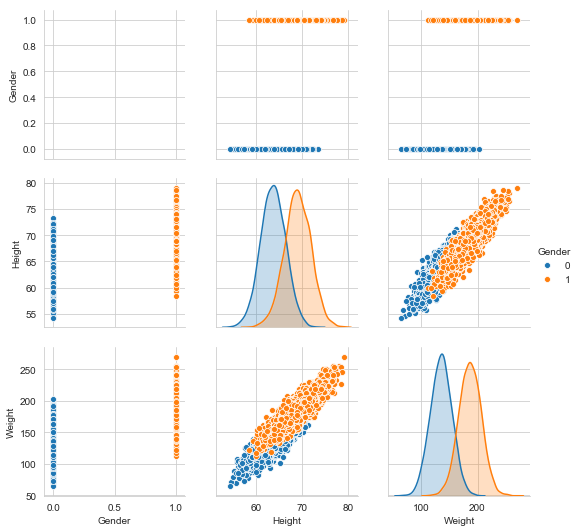

In [43]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='Gender')

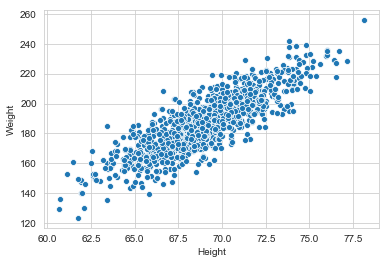

In [44]:
sns.scatterplot(x="Height",y="Weight",data=data.head(1000),palette="plasma")

In [45]:
sns.set_style("whitegrid")
sns.relplot(x="Height",y="Weight",data=data,hue="Gender",palette='plasma',markers=['+'.'o'])

SyntaxError: invalid syntax (<ipython-input-45-22b787ce2ffd>, line 2)

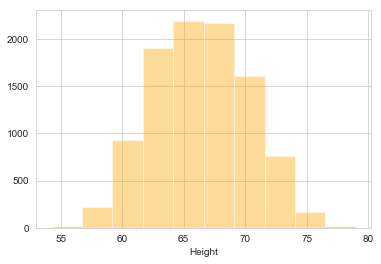

In [46]:
sns.distplot(data['Height'],bins=10,kde=False,color='orange')

In [47]:
data['Height'].mean()

66.36755975482106

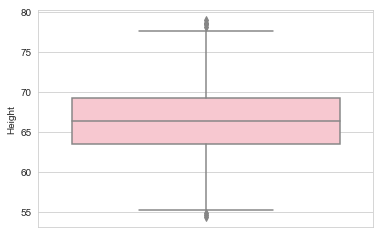

In [48]:
sns.boxplot(y=data['Height'],color='pink')

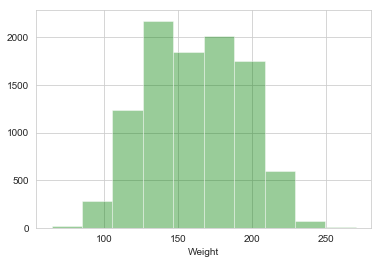

In [49]:
sns.distplot(data["Weight"],bins=10,kde=False,color='green')

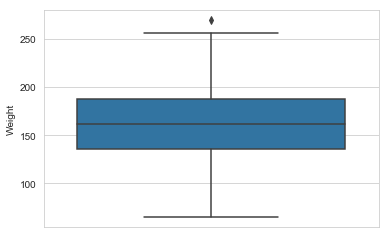

In [50]:
sns.boxplot(y=
            data['Weight'])

In [51]:
data.isnull().count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [58]:
x=data.iloc[:,:-1]
y=data.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()

In [66]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
pred=lr.predict(x_test)

In [70]:
pred

array([141.96448664, 176.53477601, 219.84158184, ..., 123.9647269 ,
       169.37980424, 151.80026352])

In [86]:

print(lr.predict([[1,60.6789]]))
print(lr.predict([[0,60.6789]]))
#print(lr.predict([[1,60.6789]]))
print(lr.predict([[0,74]]))

[137.144334]
[117.79841976]
[197.38320311]


In [87]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,r2_score